# 생물정보학 및 실습 1 - Term Project용 환경 셋업

```
생물정보학 및 실습 1
서울대학교 생물정보학전공/생명과학부 2025년 1학기

이 노트북은 Creative Commons BY-SA 조건으로 재사용 가능합니다.
장혜식 <hyeshik@snu.ac.kr>, 서울대학교 생명과학부
```

이 노트북은 Google Colab을 이용해서 Term Project를 할 수 있도록 환경을 준비해 줍니다. 터미널 사용이 원활하지 않은 상태이고, 데이터를 오랫동안 보관하기 어렵기 때문에 되도록 개인용 컴퓨터에서 [Anaconda](https://www.anaconda.com/)나 [JupyterLab](https://jupyterlab.readthedocs.io/en/stable/) 등을 설치하고 사용하시는 것이 편하지만, 개인용 컴퓨터 사양이 부족한 경우에는 Google CoLab을 사용할 수도 있습니다. 개인용 컴퓨터를 쓸 때는 Windows에서는 [WSL2](https://docs.microsoft.com/en-us/windows/wsl/install-win10)를 쓰시면 리눅스 커맨드라인 환경을 쓸 수 있습니다. Google Colab은 창을 닫은 후 90분 후, 또는 창을 처음 열고 12시간 후에 환경을 닫아버리기 때문에 매번 실습할 때마다 새로 셋업이 필요합니다. `Runtime->Run All`을 실행해서 전체를 한 번 실행하시면 준비됩니다. 모든 것이 잘 안 되고 뭔가 꼬인 느낌이 강하게 들 때는 `Runtime->Disconnect and delete runtime`을 누르고 새로 시작하시면 될 수도 있습니다.

Colab 상에서 파일 경로나 디렉토리를 더 쉽게 보고 싶은 분들은, 화면 왼쪽의 아이콘들 중 가장 아래 폴더 아이콘을 눌러서 볼 수 있습니다.

`Runtime->Run All`으로 실행했을 때, `wget`이나 `rsync` 명령이 연결이 잘 안 되어 중간에 에러가 일부 날 수 있지만 해당 셀만 다시 실행하면 해결되는 경우도 있습니다. 해당되는 셀에는 셀의 앞이나 뒤에 추가 설명을 작성하였으니 참고해 주세요.

## Google Drive 마운트

데이터 파일들을 불러오고 저장하기 위해서 Google Drive를 연결합니다. **이번엔 스크립트 파일을 편집해야 하기 때문에 Google Drive 마운트를 하지 않으면 vim등 콘솔에서 쓸 수 있는 에디터를 쓰셔야 합니다.** 화면에 나오는 주소를 눌러서 인증하고 인증 코드를 그 아래에 입력하세요. 그러면 `/contents/drive/MyDrive`에서 자신의 Drive 최상단 폴더가 보입니다. Google CoLab에서 접속하지 않고, 본인 컴퓨터 또는 연구실 워크스테이션 등 다른 컴퓨터를 쓰시는 경우에는 저장공간이 충분하므로 이 부분은 생략하고 지나갑니다.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

## 실습용 Bioconda 환경 설치하기
Google CoLab에서 접속하지 않고, 본인 컴퓨터 또는 연구실 워크스테이션 등 다른 컴퓨터를 쓰시는 경우에는 따로 실습용 [Bioconda](https://bioconda.github.io/) 환경을 구축해서 이 노트북을 그 환경 안에서 띄우시면 됩니다.

CoLab을 쓰시는 분들은 다음에 따라서 실습용 프로그램들을 쉽게 설치할 수 있도록 [Bioconda](https://bioconda.github.io/) 환경을 만듭니다. 실행하고 진행상황을 관찰하다가 에러로 보이는 것이 있으면 잘 읽어보고 해결합니다.

파이썬 모듈들은 Colab쪽의 파이썬 인터프리터를 바꿀 수 없기 때문에 Conda에 설치하더라도 사용하기 어렵습니다. 파이썬 모듈은 `pip` 명령어로 설치하시면 Colab에서 불러와서 사용할 수 있습니다.

환경 초기화에 관련된 스크립트는 [GitHub 프로젝트](https://github.com/hyeshik/colab-biolab)에 있습니다.

In [43]:
!cd /Users/rimi/Projects/binfo1_A
!git clone https://github.com/hyeshik/colab-biolab.git
!cd colab-biolab && bash tools/setup.sh
!bash /Users/rimi/Projects/binfo1_A/colab-biolab/tools/setup.sh
exec(open('colab-biolab/tools/activate_conda.py').read())

fatal: could not create work tree dir 'colab-biolab': No such file or directory
zsh:cd:1: no such file or directory: colab-biolab
bash: /Users/rimi/Projects/binfo1_A/colab-biolab/tools/setup.sh: No such file or directory


FileNotFoundError: [Errno 2] No such file or directory: 'colab-biolab/tools/activate_conda.py'

Google CoLab에서 shell command를 실행할 때는 명령 앞에 !을 붙이면 실행할 수 있습니다.

## 시퀀싱 데이터 다운로드
이제 실습 수업에서 필요한 시퀀싱 데이터를 다운로드 받아서 설치합시다. 드라이브 공간만 충분하면 데이터는 계속 저장돼 있기 때문에 학기 전체를 통해서 딱 한 번만 하시면 됩니다. Colab에서는 작업용 데이터를 Google Drive 폴더 아래의 `binfo-datapack1`에 저장합니다. 실습용 데이터는 `/content/drive/MyDrive/binfo1-datapack1`에 풀리게 됩니다.

### (Option 1) Google CoLab에서 접속한 경우
1. [Google Drive 공유폴더](https://drive.google.com/drive/folders/1QBJednh-C7A17PFOlpZHBKyDmBvd6klh?usp=sharing)에 접속합니다.
1. 제목줄의 "binfo1-datapack1 ▾"에서 ▾을 누릅니다.
1. Organize -> Add shortcut to Drive를 누릅니다.
1. My Drive를 선택해서 ADD SHORTCUT 버튼을 누릅니다.
1. 다음 cell을 실행해서 링크가 제대로 들어왔는지 확인합니다. (바로 확인되지 않으면 3–5분 정도 기다렸다가 하면 됩니다.)
1. 제대로 확인되면 다음으로 넘어갑니다.


In [ ]:
!ls -al /content/drive/MyDrive/binfo1-datapack1/

### (Option 2) CoLab외의 다른 환경에서 접속한 경우
본인 컴퓨터나 연구실 워크스테이션 등에서 작업하는 경우에는 다음 명령어로 다운로드 받으시면 됩니다.

첫 번째에는 wget이 접속오류를 내는 경우가 많으니, 접속에러가 발생하면 다시 한 번 실행해 보세요. `/content/drive/Mydrive` 부분은 원하는 저장 경로로 바꿔서 지정하시면 됩니다.

In [44]:
!wget -O - --no-check-certificate https://hyeshik.qbio.io/binfo/binfo1-datapack1.tar | tar -C /Users/rimi/Projects/binfo1_A/colab-biolab -xf -

--2025-05-08 17:36:28--  https://hyeshik.qbio.io/binfo/binfo1-datapack1.tar
Resolving hyeshik.qbio.io (hyeshik.qbio.io)... 147.47.203.129
Connecting to hyeshik.qbio.io (hyeshik.qbio.io)|147.47.203.129|:443... connected.
  Unable to locally verify the issuer's authority.
HTTP request sent, awaiting response... 200 OK
Length: 6424668160 (6.0G) [application/octet-stream]
Saving to: ‘STDOUT’

-                   100%[===================>]   5.98G  35.2MB/s    in 3m 25s  

2025-05-08 17:39:54 (29.9 MB/s) - written to stdout [6424668160/6424668160]



그리고, GENCODE Annotation 데이터도 미리 받아서 저장해 둡니다. 에러가 나면 다시 한 번 실행해 봅니다.

In [45]:
!wget --no-check-certificate -O /Users/rimi/Projects/binfo1_A/colab-biolab/binfo1-datapack1/gencode.gtf.gz http://ftp.ebi.ac.uk/pub/databases/gencode/Gencode_mouse/release_M27/gencode.vM27.annotation.gtf.gz

--2025-05-08 17:39:54--  http://ftp.ebi.ac.uk/pub/databases/gencode/Gencode_mouse/release_M27/gencode.vM27.annotation.gtf.gz
Resolving ftp.ebi.ac.uk (ftp.ebi.ac.uk)... 193.62.193.165
Connecting to ftp.ebi.ac.uk (ftp.ebi.ac.uk)|193.62.193.165|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 28359457 (27M) [application/x-gzip]
Saving to: ‘/Users/rimi/Projects/binfo1_A/colab-biolab/binfo1-datapack1/gencode.gtf.gz’

/Users/rimi/Project 100%[===================>]  27.04M  1.22MB/s    in 65s     

2025-05-08 17:41:01 (427 KB/s) - ‘/Users/rimi/Projects/binfo1_A/colab-biolab/binfo1-datapack1/gencode.gtf.gz’ saved [28359457/28359457]



### 파일 체크섬 확인

받은 데이터의 MD5 체크섬을 확인합니다. 한참 걸립니다. 각 파일들의 원래 체크섬은 다음과 같습니다. 한 번 비교해 보세요. (나중에 자동으로 비교하고 싶으시면 `md5sum -c` 옵션을 사용하면 됩니다. 여기서는 MD5를 처음 써 보는 의미에서 직접 비교해 봅시다.)

```
140aaf30bcb9276cc716f8699f04ddd6  CLIP-35L33G.bam
f1b3336ed7e2f97d562dcc71641251bd  CLIP-35L33G.bam.bai
328883a73d507eafbf5b60bd6b906201  RNA-control.bam
02073818e2f398a73c3b76e5169de1ca  RNA-control.bam.bai
b09550d09d6c2a4ce27f0226f426fdb1  RNA-siLin28a.bam
fef112c727244060ea62d3f2564a07f6  RNA-siLin28a.bam.bai
28bbd0c47d725669340c784f1b772c01  RNA-siLuc.bam
43590fdc4d81905c0432e0d1cb8cfd5b  RNA-siLuc.bam.bai
5c08a9297307bc83259e658c4474f0cc  RPF-siLin28a.bam
a1bb3e29be412dfd7fd8d16b1b1acc4c  RPF-siLin28a.bam.bai
f2eebf50943024d0116c9cd3e744c707  RPF-siLuc.bam
dc24f69e8f571fc8be30f28ce5b84fcd  RPF-siLuc.bam.bai
```

In [46]:
!md5sum /Users/rimi/Projects/binfo1_A/colab-biolab/binfo1-datapack1/*

140aaf30bcb9276cc716f8699f04ddd6  /Users/rimi/Projects/binfo1_A/colab-biolab/binfo1-datapack1/CLIP-35L33G.bam
f1b3336ed7e2f97d562dcc71641251bd  /Users/rimi/Projects/binfo1_A/colab-biolab/binfo1-datapack1/CLIP-35L33G.bam.bai
328883a73d507eafbf5b60bd6b906201  /Users/rimi/Projects/binfo1_A/colab-biolab/binfo1-datapack1/RNA-control.bam
02073818e2f398a73c3b76e5169de1ca  /Users/rimi/Projects/binfo1_A/colab-biolab/binfo1-datapack1/RNA-control.bam.bai
b09550d09d6c2a4ce27f0226f426fdb1  /Users/rimi/Projects/binfo1_A/colab-biolab/binfo1-datapack1/RNA-siLin28a.bam
fef112c727244060ea62d3f2564a07f6  /Users/rimi/Projects/binfo1_A/colab-biolab/binfo1-datapack1/RNA-siLin28a.bam.bai
28bbd0c47d725669340c784f1b772c01  /Users/rimi/Projects/binfo1_A/colab-biolab/binfo1-datapack1/RNA-siLuc.bam
43590fdc4d81905c0432e0d1cb8cfd5b  /Users/rimi/Projects/binfo1_A/colab-biolab/binfo1-datapack1/RNA-siLuc.bam.bai
5c08a9297307bc83259e658c4474f0cc  /Users/rimi/Projects/binfo1_A/colab-biolab/binfo1-datapack1/RPF-siLin28a

In [47]:
!ls -al /Users/rimi/Projects/binfo1_A/colab-biolab/binfo*

total 12678048
drwxr-xr-x@ 15 rimi  staff         480 May  8 17:39 .
drwxr-xr-x@ 11 rimi  staff         352 May  8 17:36 ..
-rw-r--r--@  1 rimi  staff  1370036258 May  6  2021 CLIP-35L33G.bam
-rw-r--r--@  1 rimi  staff     3118336 May  6  2021 CLIP-35L33G.bam.bai
-rw-r--r--@  1 rimi  staff  1003658801 May  6  2021 RNA-control.bam
-rw-r--r--@  1 rimi  staff     2276104 May  6  2021 RNA-control.bam.bai
-rw-r--r--@  1 rimi  staff  1260991122 May  6  2021 RNA-siLin28a.bam
-rw-r--r--@  1 rimi  staff     2710744 May  6  2021 RNA-siLin28a.bam.bai
-rw-r--r--@  1 rimi  staff   981684502 May  6  2021 RNA-siLuc.bam
-rw-r--r--@  1 rimi  staff     2606104 May  6  2021 RNA-siLuc.bam.bai
-rw-r--r--@  1 rimi  staff   737352902 May  6  2021 RPF-siLin28a.bam
-rw-r--r--@  1 rimi  staff     2482768 May  6  2021 RPF-siLin28a.bam.bai
-rw-r--r--@  1 rimi  staff  1055123479 May  6  2021 RPF-siLuc.bam
-rw-r--r--@  1 rimi  staff     2605912 May  6  2021 RPF-siLuc.bam.bai
-rw-r--r--@  1 rimi  staff    28359457 M

실습에 필요한 프로그램들 몇 가지를 추가로 설치합니다.

In [6]:
!conda install bioconda::subread

Channels:
 - conda-forge
 - defaults
 - bioconda
Platform: osx-arm64
Solving environment: done

## Package Plan ##

  environment location: /Users/rimi/miniconda3/envs/biolab

  added / updated specs:
    - bioconda::subread


The following NEW packages will be INSTALLED:

  subread            bioconda/osx-arm64::subread-2.1.1-hba9b596_0 


Proceed ([y]/n)? ^C

CondaSystemExit: 
Operation aborted.  Exiting.



## Transcript count table 마련하기

제공된 alignment와 annotation 파일들을 이용해서 transcript별 read count를 구해봅니다. 실제 연구에서는 multi-mapping 등을 고려해야 하지만, 여기서는 단순화해서 모두 무시합니다.

먼저 작업 디렉토리를 만들고 데이터를 원본 디렉토리에서 복사해 옵니다. (이미 이 노트북을 실행한 적이 있으면 다시 할 필요는 없습니다.)

In [48]:
!cd /Users/rimi/Projects/binfo1_A; mkdir cctest; touch cctest/.test; ls -al cctest/

total 0
drwxr-xr-x@  3 rimi  staff   96 May  8 17:43 .
drwxr-xr-x  10 rimi  staff  320 May  8 17:43 ..
-rw-r--r--@  1 rimi  staff    0 May  8 17:43 .test


In [49]:
!rsync -h

usage: rsync [-0468BCDEFHIKLOPRSTWVabcdghklnopqrtuvxyz] [-e program] [-f filter]
	[--8-bit-output] [--address=sourceaddr]
	[--append] [--backup-dir=dir] [--bwlimit=limit] [--cache | --no-cache]
	[--compare-dest=dir] [--contimeout] [--copy-dest=dir] [--copy-unsafe-links]
	[--del | --delete-after | --delete-before | --delete-during]
	[--delay-updates] [--dirs] [--no-dirs]
	[--exclude] [--exclude-from=file]
	[--extended-attributes]
	[--existing] [--force] [--ignore-errors]
	[--ignore-existing] [--ignore-non-existing] [--include]
	[--include-from=file] [--inplace] [--keep-dirlinks] [--link-dest=dir]
	[--max-delete=NUM] [--max-size=SIZE] [--min-size=SIZE]
	[--modify-window=sec] [--no-motd] [--numeric-ids]
	[--out-format=FMT] [--partial] [--password-file=pwfile] [--port=portnumber]
	[--progress] [--protocol] [--read-batch=file]
	[--remove-source-files] [--rsync-path=program] [--safe-links] [--size-only]
	[--sockopts=sockopts] [--specials] [--suffix] [--super] [--timeout=seconds]
	[--only-wri

Colab에서 실습하시는 경우 Google Drive 환경에 따라서 간혹 `rsync`에서 에러가 날 수 있습니다. (주석 처리해 두었습니다.)

 그럴 때는 `rsync`대신 `cp` 명령으로 `binfo1-datapack1`에 있는 파일들을 모두 `binfo1-work`로 옮겨서 작업하시면 됩니다. `cp` 명령도 에러가 난다면, 구글 드라이브 GUI를 이용해서 복사해도 괜찮습니다. Colab에서는 파일들을 `binfo1-work`로 꼭 옮겨 주세요. Colab 외에서 실습하시는 분들은 편한 방법대로 하시면 됩니다.

In [50]:
!mkdir -p /Users/rimi/Projects/binfo1_A/binfo1-work
# !rsync -Pav /content/drive/MyDrive/binfo1-datapack1/ /content/drive/MyDrive/binfo1-work/

In [2]:
%cd /Users/rimi/Projects/binfo1_A/binfo1-work

/Users/rimi/Projects/binfo1_A/binfo1-work


In [52]:
%cp -r /Users/rimi/Projects/binfo1_A/colab-biolab/binfo1-datapack1/* /Users/rimi/Projects/binfo1_A/binfo1-work/

자! bam 파일에 담긴 aligned reads와 gtf 파일에 담긴 gene annotation으로 gene별 read count를 구합니다.

In [8]:
!featureCounts -a gencode.gtf.gz -o read-counts.txt *.bam


        ==========     _____ _    _ ____  _____  ______          _____  
        =====         / ____| |  | |  _ \|  __ \|  ____|   /\   |  __ \ 
          =====      | (___ | |  | | |_) | |__) | |__     /  \  | |  | |
            ====      \___ \| |  | |  _ <|  _  /|  __|   / /\ \ | |  | |
              ====    ____) | |__| | |_) | | \ \| |____ / ____ \| |__| |
        ==========   |_____/ \____/|____/|_|  \_\______/_/    \_\_____/
	  v2.1.1

//========================== featureCounts setting ===========================\\
||                                                                            ||
||             Input files : 6 BAM files                                      ||
||                                                                            ||
||                           CLIP-35L33G.bam                                  ||
||                           RNA-control.bam                                  ||
||                           RNA-siLin28a.bam                    

결과를 pandas로 읽어와 봅니다.

In [3]:
#!conda install pandas
import pandas as pd
cnts = pd.read_csv('read-counts.txt', sep='\t', comment='#', index_col=0)
cnts.head()

,Chr,Start,End,Strand,Length,CLIP-35L33G.bam,RNA-control.bam,RNA-siLin28a.bam,RNA-siLuc.bam,RPF-siLin28a.bam,RPF-siLuc.bam
Geneid,,,,,,,,,,,
ENSMUSG00000102693.2,chr1,3143476,3144545,+,1070,0,0,0,0,0,0
ENSMUSG00000064842.3,chr1,3172239,3172348,+,110,0,0,0,0,0,0
ENSMUSG00000051951.6,chr1;chr1;chr1;chr1;chr1;chr1;chr1,3276124;3276746;3283662;3283832;3284705;349192...,3277540;3277540;3285855;3286567;3287191;349212...,-;-;-;-;-;-;-,6094,4,1,1,1,0,0
ENSMUSG00000102851.2,chr1,3322980,3323459,+,480,3,0,0,0,0,0
ENSMUSG00000103377.2,chr1,3435954,3438772,-,2819,0,0,0,0,0,0


이제 한 번 대충 그림을 그려 봅니다.

In [4]:
cnts['clip_enrichment'] = cnts['CLIP-35L33G.bam'] / cnts['RNA-control.bam']
cnts['rden_change'] = (cnts['RPF-siLin28a.bam'] / cnts['RNA-siLin28a.bam']) / (cnts['RPF-siLuc.bam'] / cnts['RNA-siLuc.bam'])
cnts.head()

,Chr,Start,End,Strand,Length,CLIP-35L33G.bam,RNA-control.bam,RNA-siLin28a.bam,RNA-siLuc.bam,RPF-siLin28a.bam,RPF-siLuc.bam,clip_enrichment,rden_change
Geneid,,,,,,,,,,,,,
ENSMUSG00000102693.2,chr1,3143476,3144545,+,1070,0,0,0,0,0,0,NaN,NaN
ENSMUSG00000064842.3,chr1,3172239,3172348,+,110,0,0,0,0,0,0,NaN,NaN
ENSMUSG00000051951.6,chr1;chr1;chr1;chr1;chr1;chr1;chr1,3276124;3276746;3283662;3283832;3284705;349192...,3277540;3277540;3285855;3286567;3287191;349212...,-;-;-;-;-;-;-,6094,4,1,1,1,0,0,4.0,NaN
ENSMUSG00000102851.2,chr1,3322980,3323459,+,480,3,0,0,0,0,0,inf,NaN
ENSMUSG00000103377.2,chr1,3435954,3438772,-,2819,0,0,0,0,0,0,NaN,NaN


/Users/rimi/miniconda3/envs/biolab/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)


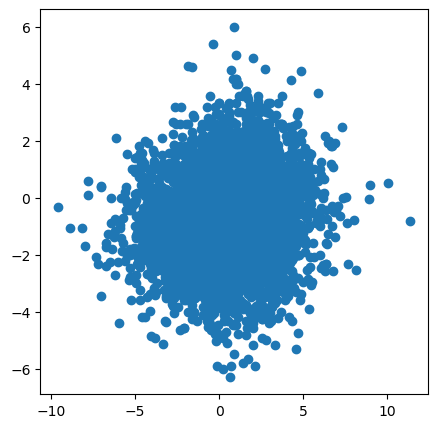

In [7]:
# !conda install matplotlib
from matplotlib import pyplot as plt
import numpy as np

fig, ax = plt.subplots(1, 1, figsize=(5, 5))
ax.scatter(np.log2(cnts['clip_enrichment']),
           np.log2(cnts['rden_change']))

이 그림에는 문제가 많이 있습니다. 논문의 그림 Figure 4D처럼 한 번 만들어 봅시다~

/Users/rimi/miniconda3/envs/biolab/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/rimi/miniconda3/envs/biolab/lib/python3.11/site-packages/numpy/_core/_methods.py:135: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)


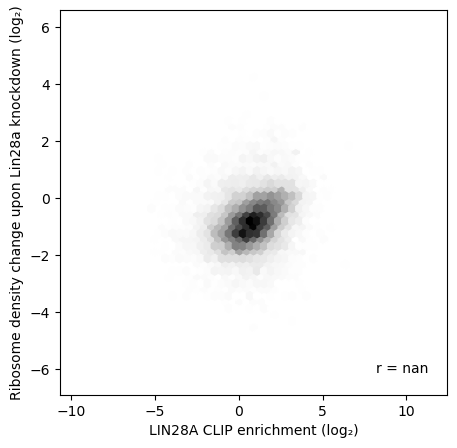

In [8]:
# 여기에 코드를 새로 작성해서 논문의 그림과 비슷하게 만들어 봅니다.
from matplotlib import pyplot as plt
import numpy as np
import scipy.stats as stats

x = np.log2(cnts['clip_enrichment'])
y = np.log2(cnts['rden_change'])
fig, ax = plt.subplots(1, 1, figsize=(5, 5))

ax.hexbin(x, y, gridsize=50, cmap='gray_r', mincnt=1)

# Calculate the Pearson correlation coefficient
r, _ = stats.pearsonr(x, y)
# Add the correlation coefficient to the plot
ax.text(0.95, 0.05, f'r = {r:.4f}', transform=ax.transAxes,
        ha='right', va='bottom', fontsize=10)

ax.set_xlabel('LIN28A CLIP enrichment (log₂)')
ax.set_ylabel('Ribosome density change upon Lin28a knockdown (log₂)')

# Show the plot
plt.show()

## Protein localization 반영하기

논문 그림(Figure 5B, S6A)에서는 protein localization을 반영해서 색으로 나타냈습니다. 이것을 한 번 구현해 봅시다. 각 gene product의 localization을 따로 구하려면 좀 귀찮기 때문에 미리 모아 두었습니다. UniProt에서 매핑된 데이터를 토대로 아주 명확한 것만 일부 정리한 것입니다. 이것도 마찬가지로 처음엔 에러가 나기도 하니까, 다시 실행해보면 거의 잘 됩니다~

In [5]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
mouselocal = pd.read_csv('https://hyeshik.qbio.io/binfo/mouselocalization-20210507.txt', sep='\t')
mouselocal.head()

,gene_id,Gene names,type
0,ENSMUSG00000000001,Gnai3,cytoplasm
1,ENSMUSG00000000028,Cdc45 Cdc45l Cdc45l2,nucleus
2,ENSMUSG00000000049,Apoh B2gp1,cytoplasm
3,ENSMUSG00000000058,Cav2,cytoplasm
4,ENSMUSG00000000085,Scmh1,nucleus


이제 이 localization 데이터와 위에서 만든 scatter를 결합해서 논문 그림과 비슷하게 만들어 봅시다.

9414
              gene_id               type  clip_enrichment  rden_change
0  ENSMUSG00000000001          cytoplasm         2.762901     0.637359
1  ENSMUSG00000000028            nucleus         1.011928     0.521917
4  ENSMUSG00000000085            nucleus         1.051546     0.277646
6  ENSMUSG00000000094            nucleus        16.000000     1.285714
8  ENSMUSG00000000120  integral membrane         2.580460     0.618826
Unique localization values: ['cytoplasm' 'nucleus' 'integral membrane']


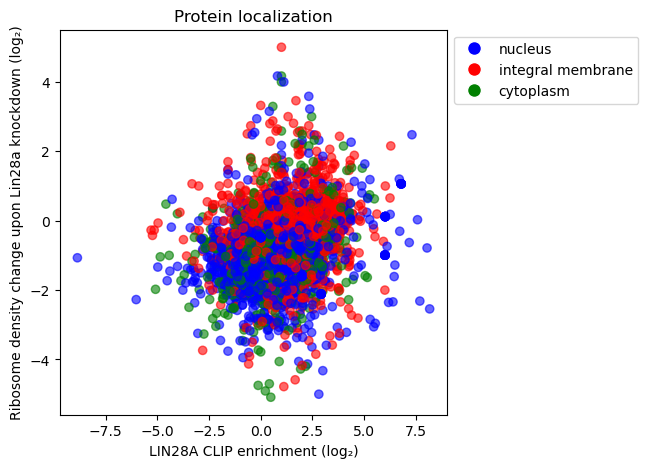

In [11]:
# 여기에 새로 코드를 작성해서 논문 그림과 비슷하게 만들어 봅시다.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import ssl

ssl._create_default_https_context = ssl._create_unverified_context
mouselocal = pd.read_csv('https://hyeshik.qbio.io/binfo/mouselocalization-20210507.txt', sep='\t')

cnts_df = pd.DataFrame(cnts)
cnts_df.index = cnts_df.index.str.split('.').str[0]
print(len(set(mouselocal['gene_id']) & set(cnts_df.index)))
# Merge mouselocal and cnts
merged_data = pd.merge(mouselocal[['gene_id', 'type']],
                       cnts_df[['clip_enrichment', 'rden_change']],
                       left_on='gene_id', right_index= True, how='inner')
merged_data = merged_data[(merged_data['clip_enrichment'] > 0) &
                          (merged_data['rden_change'] > 0)].dropna(subset=['clip_enrichment', 'rden_change'])
print(merged_data.head())
# Map localization to colors
print("Unique localization values:", merged_data['type'].unique())
color_map = {'nucleus': 'blue', 'integral membrane': 'red', 'cytoplasm': 'green'}
colors = merged_data['type'].map(color_map)

# Create the scatter plot
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
scatter = ax.scatter(np.log2(merged_data['clip_enrichment']),
                     np.log2(merged_data['rden_change']),
                     c=colors, alpha=0.6)
legend_elements = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color,
                              markersize=10, label=loc)
                   for loc, color in color_map.items()]
ax.legend(handles=legend_elements, loc='upper left', bbox_to_anchor=(1, 1))
ax.set_xlabel('LIN28A CLIP enrichment (log₂)')
ax.set_ylabel('Ribosome density change upon Lin28a knockdown (log₂)')
ax.set_title('Protein localization')

plt.show()